## Template Matching

- Used if we have the smaller image we are looking for exactly cut out of the larger image.

## Import Libraries

In [2]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt 

## Import Full Image Data

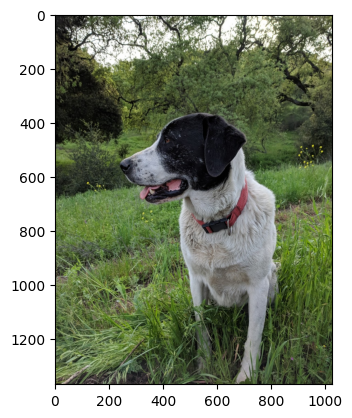

In [3]:
full_image = cv.imread("../data/Files/DATA/sammy.jpg")

'''OpenCV reads images in the BGR color space, but Matplotlib expects images in the RGB (Red, Green, Blue) color space. To address this, the cvtColor function from OpenCV is used to convert the image from BGR to RGB

# order of data representation is the only difference between RGB and BGR
RGB: Red, Green, Blue (used by most image processing libraries and applications).
BGR: Blue, Green, Red (used by OpenCV).'''
full_image = cv.cvtColor(full_image,cv.COLOR_BGR2RGB)

plt.imshow(full_image)

## Import Face Data

In [ ]:
face_image = cv.imread("../data/Files/DATA/sammy_face.jpg")
face_image = cv.cvtColor(face_image, cv.COLOR_BGR2RGB)

plt.imshow(face_image)

- We can have different methods to look implement TemplateMatching

In [ ]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval()
# function to convert to function
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
height,width,channel = face_image.shape 


for current_method in methods:

  full_image_copy = full_image.copy()
  method = eval(current_method)

  # result stores the amount of matching it got in each cell 
  # if the image was represented as a matrix
  result = cv.matchTemplate(full_image_copy,face_image,method)

  # minMaxLoc returns where it found the maximum and minimum 
  # matches along with their location
  min_val,max_val,min_loc,max_loc = cv.minMaxLoc(result)
  top_left = None

  '''cv.TM_SQDIFF_NORMED and cv.TM_SQDIFF calculate the 
  squared difference between the template and the image 
  region, with lower values indicating a better match.'''

  if current_method in ['cv.TM_SQDIFF_NORMED','cv.TM_SQDIFF']:
    top_left = min_loc
  else:
    top_left = max_loc


  top_leftX,top_leftY = top_left

  bottom_rightX = top_leftX + width
  bottom_rightY = top_leftY + height
  
  bottom_right = (bottom_rightX,bottom_rightY)

  cv.rectangle(img=full_image_copy,pt1=top_left,pt2=bottom_right,color=(0,255,0),thickness=5)

  # the plt.subplot function from the Matplotlib library
  # to create multiple subplots within a single figure

  '''
### Understanding the Arguments

The arguments passed to [`plt.subplot`] are integers that define the grid layout and the position of the subplot within that grid. The format of the argument is `nrowsncolsindex`, where:

- **`nrows`**: The number of rows in the grid.
- **`ncols`**: The number of columns in the grid.
- **`index`**: The position of the subplot within the grid, starting from 1 in the upper left corner and increasing to the right.'''

  plt.subplot(121)
  plt.imshow(result)
  plt.title("HEATMAP of Template Matching")


  plt.subplot(122)
  plt.imshow(full_image_copy)
  plt.title("Template Detection")

  plt.suptitle(current_method)

  plt.show()

  print('\n\n')
  

-  Now let's cutout a specific part of an existing image and look for it in the original image.

In [ ]:
# get size of the original image 
height, width, channel = full_image.shape


# let's try to cutout the legs 
# define the region of interest (ROI) coordinates
x1, y1, x2, y2 = 450, 1000, 850, 1367  # Corrected coordinates

# crop the image using array slicing
leg_image = full_image[y1:y2, x1:x2]

cv.imwrite('../data/Files/DATA/sammy_leg.jpg',leg_image)

## Detect Leg

### Import Leg Image

In [ ]:
leg_image = cv.imread("../data/Files/DATA/sammy_leg.jpg")
leg_image = cv.cvtColor(leg_image, cv.COLOR_BGR2RGB)

plt.imshow(leg_image)

In [ ]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval()
# function to convert to function


methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
           'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
height, width, channel = leg_image.shape


for current_method in methods:

  full_image_copy = full_image.copy()
  method = eval(current_method)

  # result stores the amount of matching it got in each cell
  # if the image was represented as a matrix
  result = cv.matchTemplate(full_image_copy, leg_image, method)

  # minMaxLoc returns where it found the maximum and minimum
  # matches along with their location
  min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)
  top_left = None

  '''cv.TM_SQDIFF_NORMED and cv.TM_SQDIFF calculate the 
  squared difference between the template and the image 
  region, with lower values indicating a better match.'''

  if current_method in ['cv.TM_SQDIFF_NORMED', 'cv.TM_SQDIFF']:
    top_left = min_loc
  else:
    top_left = max_loc

  top_leftX, top_leftY = top_left

  bottom_rightX = top_leftX + width
  bottom_rightY = top_leftY + height

  bottom_right = (bottom_rightX, bottom_rightY)

  cv.rectangle(img=full_image_copy, pt1=top_left,
               pt2=bottom_right, color=(0, 255, 0), thickness=5)

  # the plt.subplot function from the Matplotlib library
  # to create multiple subplots within a single figure

  '''
### Understanding the Arguments

The arguments passed to [`plt.subplot`] are integers that define the grid layout and the position of the subplot within that grid. The format of the argument is `nrowsncolsindex`, where:

- **`nrows`**: The number of rows in the grid.
- **`ncols`**: The number of columns in the grid.
- **`index`**: The position of the subplot within the grid, starting from 1 in the upper left corner and increasing to the right.'''

  plt.subplot(121)
  plt.imshow(result)
  plt.title("HEATMAP of Template Matching")

  plt.subplot(122)
  plt.imshow(full_image_copy)
  plt.title("Template Detection")

  plt.suptitle(current_method)

  plt.show()

  print('\n\n')